<b> Assignment ID #767380 </b>

*Submissions of Weekly Exercises to* <br>
**Exercises on Linear Regression Analysis - June 2025** <br>
*Week Duration:22/06/2025 - 29/06/2025*

*# Student Name :* **Arindam Mitra** <br>
*# Registration Code:* <b><i>STU20250430/14045</i></b> <br>
*# Email:* <b><i>arinmitra@gmail.com</i></b>

<b># Tutor - </b> <b><i>Mohit Sharma</b></i> <i>(mohit.sharma@skillarbitra.ge),</i> <br>
<b># Host - </b> <b><i>Ritu Verma </b></i> <i>(ritu.varma@skillarbitra.ge)</i>

## Exercise 2: Linear Regression Model & Evaluation <br>

### <i><b>Objective :</b></i> <br>
#### Train a linear regression model to predict medical charges and evaluate its performance. <br>● Model Preparation <br>● Model Training <br>● Evaluation <br><br>

#### Dataset = <i>'Medical Cost Personal Dataset'</i>
#### Filename = "Insurance.csv"
##### link = <i>https://drive.google.com/drive/folders/1L1hd465HSNrojE7Rnme55XyMJxkXNMRO?usp=drive_link</i>

### Task 1: Model Preparation <br>
#### ● Split the data into training and testing sets (e.g., 80/20). <br>● Select appropriate features (e.g., age, sex, BMI, smoker, children, etc.). <br>● Use LinearRegression() from sklearn.linear_model.

Responses :

In [23]:
# Task 1a - Split the data into training and testing sets (e.g., 80/20).

# We will first import the base dataset 'Insurance .csv', read the elements
# into a pandas dataframe, check for cleanliness of the raw data and
# construct a cleaned base dataset 'Insurance_clean.csv' and then proceed
# to splitting and encoding etc.

import pandas as pd
file_path = 'Insurance .csv'
df = pd.read_csv(file_path)

# read the first few rows of the dataframe
print(df.head())
# read the shape information of the dataframe
print(df.shape)
# read the column information of the dataframe
print(df.info())
# explain the datatypes in the dataframe
print(df.dtypes)
# look for nulls in the dataframe
print(df.isnull().sum())
# take corrective actions if nulls are found;
# if no null is found
if df.isnull().sum().sum() == 0:
    print("No nulls found")
    # save the dataframe in a new csv file
    df.to_csv('Insurance_clean2.csv', index=False)
    # update the file_path to point to the cleaned new file path
    file_path = 'Insurance_clean2.csv'
else:
    print("Nulls found")
    # identify the row and the column which has a null value and save the
    # information in a unclean_row_cols as a csv with the following columns
    # in it - col1 - dataframe index number, col2 - row number with the null
    # value, col3 - dataframe column number and
    # save them to a unclean_row_cols csv
    unclean_row_cols = df[df.isnull().any(axis=1)].stack().reset_index()
    unclean_row_cols.columns = ['col1', 'col2', 'col3']
    unclean_row_cols.to_csv('unclean_row_cols.csv', index=False)

# use the cleaned csv for further actions

# read this cleaned csv into a new dataframe
df_clean = pd.read_csv(file_path)
# read the first few rows of the dataframe
print(df_clean.head())
# read the shape information of the dataframe
print(df_clean.shape)
# read the column information of the dataframe
print(df_clean.info())
# explain the datatypes in the dataframe
print(df_clean.dtypes)
# look for nulls in the cleaned dataframe to cross-verify
# if it is still a 'No-Null' dataframe
print(df_clean.isnull().sum())

# Now the data is in clean shape for the next set of steps, i.e.
# encoding of the categorical data in df_clean
# encoding the categorical features (sex, smoker, region) using one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=['sex', 'smoker', 'region'])
# print the first few rows of the encoded dataframe
print(df_encoded.head())

# Splitting the data into training and testing sets (e.g., 80/20).

# using sklearn to split the data into train and test split
from sklearn.model_selection import train_test_split
# Define features (X) and target (y) from the encoded dataframe
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age           int64
sex          object
bmi         float64
children      int64
s

In [24]:
# Task 1b: Select appropriate features (e.g., age, sex, BMI, smoker, children, etc.)
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [25]:
X_train.shape

(1070, 11)

In [26]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,True,False,True,False,True,False,False,False
887,36,30.020,0,True,False,True,False,False,True,False,False
890,64,26.885,0,True,False,False,True,False,True,False,False
1293,46,25.745,3,False,True,True,False,False,True,False,False
259,19,31.920,0,False,True,False,True,False,True,False,False


In [27]:
X_test.shape

(268, 11)

In [28]:
y_train.head()

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


In [29]:
y_train.shape

(1070,)

In [30]:
y_test.head()

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180


In [31]:
y_test.shape

(268,)

In [32]:
# Task 1c: Use LinearRegression() from sklearn.linear_model to Train the model
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

### Task 2: Model Training <br>
#### ● Fit the model using training data. <br> ● Output regression coefficients and intercept.

#### Responses :

In [33]:
# Task 2a:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Task 2b:
# Output regression coefficients and intercept
# print the coefficients
print('Coefficients:', model.coef_)


Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]


In [35]:
# X_train columns information
X_train.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [36]:
# print the intercept
print('Intercept:', model.intercept_)

Intercept: -574.5357125101964


### Task 3: Evaluation <br>
#### ● Predict on the test set. <br>● Calculate evaluation metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score <br>
#### ● Visualize:
- Actual vs. predicted charges scatter plot.
- Residuals plot.

#### Responses :

In [37]:
# Task 3a:
# Predict on the test set
y_pred = model.predict(X_test)
#
# print(y_pred)

In [38]:
# Task 3b:
# Calculate Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 4181.194473753647


In [39]:
# Task 3b:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 33596915.85136148


In [40]:
# Task 3b:
# Calculate R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
#

R2 Score: 0.7835929767120722


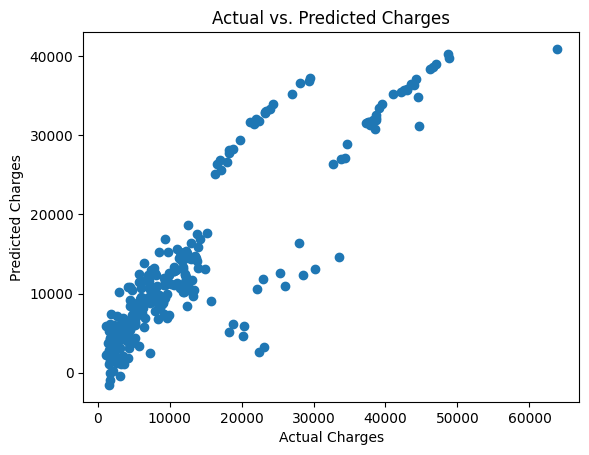

In [41]:
# Task 3c:
# Visualize Actual vs. Predicted charges scatter plot.
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

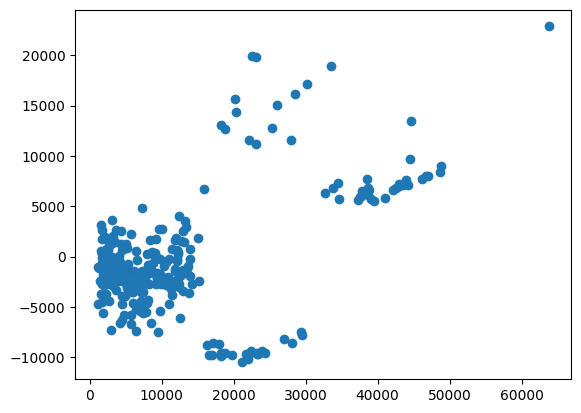

In [42]:
# Task 3c:
# Visualise Residuals plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)

#**Brief interpretation of our linear regression model's results:**

## **Evaluation Metrics:**

##*Mean Absolute Error (MAE):*
The MAE of approximately 4181.19 means that, on average, your model's predictions for medical charges are off by about $4181.19. This gives you a sense of the typical magnitude of the errors in your predictions.

##*Mean Squared Error (MSE):*
The MSE of approximately 33,596,915.85 is a larger value because it squares the errors. MSE penalizes larger errors more heavily than MAE. While the number itself is large, it's useful for comparing different models trained on the same data.

##*R² Score:*
The R² score of approximately 0.784 indicates that about 78.4% of the variance in medical charges can be explained by the features included in your model. This is a reasonably good R² score for a regression model, suggesting that your chosen features are good predictors of medical charges.
Visualizations:

##*Actual vs. Predicted Charges Scatter Plot:*
This plot shows how well your model's predictions align with the actual charges. Ideally, the points would fall along a straight line with a positive slope. Your plot shows a general linear trend, but there is scatter around the line, particularly for higher actual charges. This suggests that while the model captures the overall relationship, there's still some variability in the predictions, especially for more expensive cases.

##*Residuals Plot:*
This plot shows the difference between the actual and predicted charges (the residuals) against the actual charges. For a good linear model, you would ideally see the residuals randomly scattered around zero, with no clear pattern. Your residuals plot shows a pattern where the residuals tend to increase as the actual charges increase. This "fanning out" pattern suggests that the model's errors are larger for higher medical charges. This could indicate that the linear model might not fully capture the complexity of factors driving very high medical costs, or that there might be heteroscedasticity (non-constant variance of errors) in your data.

## Overall Interpretation:
Our linear regression model is able to explain a good portion of the variance in medical charges (R² of 0.784) and, on average, the predictions are within a reasonable range (MAE of ~$4181). However, the scatter plot and residuals plot reveal that the model's accuracy decreases for higher medical charges, and there might be some issues with the assumptions of linear regression.

## Deliverables for Exercise 2: <br>

#### ● Well-commented Jupyter Notebook/Python script with the model and metrics.<br>● Output of coeffi cients and evaluation metrics. <br>● Charts to support insights. <br>● A short paragraph interpreting the model results.

#### Responses :

#### ● Well-commented Jupyter Notebook/Python script with the model and metrics.

- Done in Task1 & 2 above
- Link to task1 = https://colab.research.google.com/drive/1cFkYKTBqDkf9_1WsaHDZDLPraMWT79gl#scrollTo=LqiPk_lcalSa&line=1&uniqifier=1 <br>

- Link to task2 = https://colab.research.google.com/drive/1cFkYKTBqDkf9_1WsaHDZDLPraMWT79gl#scrollTo=1BXFlY6I0Lyg&line=1&uniqifier=1 <br>

#### ● Charts to support insights.

- Done in Task3 above
- Link to task3 = https://colab.research.google.com/drive/1cFkYKTBqDkf9_1WsaHDZDLPraMWT79gl#scrollTo=xqZ61zXaeiAe&line=8&uniqifier=1

#### ● A short paragraph interpreting the model results.

- Brief description of interpretations of the model results are given as a markdown file after task 3 above
- Link to Report = https://colab.research.google.com/drive/1cFkYKTBqDkf9_1WsaHDZDLPraMWT79gl#scrollTo=y1VlcM9NznA2&line=22&uniqifier=1